# Countries of the World

By Krzysztof Satola from: [github.com/ksatola](https://github.com/ksatola).

Based on CRISP-DM (Cross Industry Process for Data Mining).

## Business Understanding (Gather)

### Objectives

In this notebook, I explore [Countries of the Worlds Kaggle dataset](https://www.kaggle.com/fernandol/countries-of-the-world) to answer the following questions:

1. Wealthy vs. Poor Regions: What are the Differences?
2. What Can We Do to Limit Infant Mortality?
3. Machine Learning: What are the most significant predictors determining country's GDP per capita, the key indicator of economic development of any country?

### Dataset Dictionary

- **country** - country name
- **region** - region name
- **population** - number of people within country
- **area** - country area in sq. mi.
- **popdensity** - country population density per sq. mi.
- **coast** - coastline (coast/area) ratio
- **netmigr** - net migration. The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year. When the number of immigrants is larger than the number of emigrants, a `positive net migration rate` occurs. A positive net migration rates indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a `negative net migration rate`, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced ([source](https://en.wikipedia.org/wiki/Net_migration_rate)).
- **infmortality** - infant mortality (per 1000 births)
- **gdp** - Gross Domestic Product (GDP) in $ per capita. The value of all final goods and services produced within a nation in a given year (2013), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita)).
- **literacy** - country literacy level in %
- **phones** - number phones per 1000
- **arable** - percent of arable areas
- **crops** - percent of cropland used to grow food
- **climate** - climate type
- **birthrate** - the birth rate (technically, births/population rate), the total number of live births per 1,000 in a population in 2013 ([source](https://en.wikipedia.org/wiki/Birth_rate)).
- **deathrate** - number of deaths per 1,000 individuals ([source](https://en.wikipedia.org/wiki/Mortality_rate)).
- **agriculture** - percentage of GDP sector composition ratio for agriculture economy sector ([source](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition)). Agriculture % + Industry % + Service = 100% of GDP 
- **industry** - percentage of GDP sector composition ratio for industry economy sector
- **service** - percentage of GDP sector composition ratio for service economy sector

## Data Understanding (Assess)

In [295]:
# Import required libraries
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import math

import pyarrow

%matplotlib inline

import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

import xgboost as xgb

from pickle import dump
from pickle import load

# Random state
rstate = 123

pd.options.display.float_format = '{:20.2f}'.format

In [296]:
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


In [297]:
# Document versions of used libraries
%version_information numpy, pandas, matplotlib, seaborn

Software versions
Python 3.7.1 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 7.2.0
OS Darwin 18.2.0 x86_64 i386 64bit
numpy 1.16.2
pandas 0.23.4
matplotlib 3.0.2
seaborn 0.9.0
Mon Apr 29 10:53:49 2019 BST

In [298]:
# Load data from a CSV file
df = pd.read_csv('./data/countries of the world.csv', decimal=',')

In [299]:
# Initial look into the dataset
df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
Population,31056997,3581655,32930091,57794,71201
Area (sq. mi.),647500,28748,2381740,199,468
Pop. Density (per sq. mi.),48.00,124.60,13.80,290.40,152.10
Coastline (coast/area ratio),0.00,1.26,0.04,58.29,0.00
Net migration,23.06,-4.93,-0.39,-20.71,6.60
Infant mortality (per 1000 births),163.07,21.52,31.00,9.27,4.05
GDP ($ per capita),700.00,4500.00,6000.00,8000.00,19000.00
Literacy (%),36.00,86.50,70.00,97.00,100.00


In [300]:
df.tail().T

,222,223,224,225,226
Country,West Bank,Western Sahara,Yemen,Zambia,Zimbabwe
Region,NEAR EAST,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA
Population,2460492,273008,21456188,11502010,12236805
Area (sq. mi.),5860,266000,527970,752614,390580
Pop. Density (per sq. mi.),419.90,1.00,40.60,15.30,31.30
Coastline (coast/area ratio),0.00,0.42,0.36,0.00,0.00
Net migration,2.98,NaN,0.00,0.00,0.00
Infant mortality (per 1000 births),19.62,NaN,61.50,88.29,67.69
GDP ($ per capita),800.00,NaN,800.00,800.00,1900.00
Literacy (%),NaN,NaN,50.20,80.60,90.70


In [301]:
df.sample(5, random_state=rstate).T

,125,122,156,150,79
Country,Malawi,Macau,Pakistan,Nicaragua,Greece
Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE
Population,13013926,453125,165803560,5570129,10688058
Area (sq. mi.),118480,28,803940,129494,131940
Pop. Density (per sq. mi.),109.80,16183.00,206.20,43.00,81.00
Coastline (coast/area ratio),0.00,146.43,0.13,0.70,10.37
Net migration,0.00,4.86,-2.77,-1.22,2.35
Infant mortality (per 1000 births),103.32,4.39,72.44,29.11,5.53
GDP ($ per capita),600.00,19400.00,2100.00,2300.00,20000.00
Literacy (%),62.70,94.50,45.70,67.50,97.50


In [302]:
# Dataset size
df.shape

(227, 20)

## Data Preparation (Clean)

In [303]:
# Variables
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [304]:
# Naming convention, simplify column names and build a dataset dictionary (see above)
df.rename(columns={"Country":"country", 
                  "Region":"region", 
                  "Population":"population", 
                  "Area (sq. mi.)":"area", 
                  "Pop. Density (per sq. mi.)":"popdensity", 
                  "Coastline (coast/area ratio)":"coast", 
                  "Net migration":"netmigr", 
                  "Infant mortality (per 1000 births)":"infmortality", 
                  "GDP ($ per capita)":"gdp", 
                  "Literacy (%)":"literacy", 
                  "Phones (per 1000)":"phones", 
                  "Arable (%)":"arable", 
                  "Crops (%)":"crops", 
                  "Other (%)":"other", 
                  "Climate":"climate", 
                  "Birthrate":"birthrate", 
                  "Deathrate":"deathrate", 
                  "Agriculture":"agriculture", 
                  "Industry":"industry", 
                  "Service":"service"}, inplace=True)

In [305]:
df.columns

Index(['country', 'region', 'population', 'area', 'popdensity', 'coast',
       'netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agriculture',
       'industry', 'service'],
      dtype='object')

In [306]:
# Examplary country data
df.iloc[163]

country                                     Poland 
region          EASTERN EUROPE                     
population                                 38536869
area                                         312685
popdensity                                   123.30
coast                                          0.16
netmigr                                       -0.49
infmortality                                   8.51
gdp                                        11100.00
literacy                                      99.80
phones                                       306.30
arable                                        45.91
crops                                          1.12
other                                         52.97
climate                                        3.00
birthrate                                      9.85
deathrate                                      9.89
agriculture                                    0.05
industry                                       0.31
service     

In [307]:
# Is there duplicated data in the dataset?
df.duplicated().mean()

0.0

In [308]:
# Country name can be treated as an unique identifier (no duplicated rows)
df.country.value_counts().mean()

1.0

In [309]:
# What are the dataset column data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null int64
area            227 non-null int64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
other           225 non-null float64
climate         205 non-null float64
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [310]:
# What are climate categories?
df.climate.value_counts()

2.00    111
3.00     48
1.00     29
1.50      8
4.00      6
2.50      3
Name: climate, dtype: int64

In [311]:
# Make the strings and climate categorical
df.country = df.country.astype('category')
df.region = df.region.astype('category')
df.climate = df.climate.astype('category')

df.population = df.population.astype('float64')
df.area = df.area.astype('float64')

# Remove blank spaces from region and country column values
df.region = df.region.str.strip()
df.country = df.country.str.strip()

In [312]:
# Remove 'other' column as it is not clear what it represents
df.drop('other', axis=1, inplace=True)

In [313]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 19 columns):
country         227 non-null object
region          227 non-null object
population      227 non-null float64
area            227 non-null float64
popdensity      227 non-null float64
coast           227 non-null float64
netmigr         224 non-null float64
infmortality    224 non-null float64
gdp             226 non-null float64
literacy        209 non-null float64
phones          223 non-null float64
arable          225 non-null float64
crops           225 non-null float64
climate         205 non-null category
birthrate       224 non-null float64
deathrate       223 non-null float64
agriculture     212 non-null float64
industry        211 non-null float64
service         212 non-null float64
dtypes: category(1), float64(16), object(2)
memory usage: 32.4+ KB


In [314]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
population,227.00,28740284.37,117891326.54,7026.00,437624.00,4786994.00,17497772.50,1313973713.00
area,227.00,598226.96,1790282.24,2.00,4647.50,86600.00,441811.00,17075200.00
popdensity,227.00,379.05,1660.19,0.00,29.15,78.80,190.15,16271.50
coast,227.00,21.17,72.29,0.00,0.10,0.73,10.34,870.66
netmigr,224.00,0.04,4.89,-20.99,-0.93,0.00,1.00,23.06
infmortality,224.00,35.51,35.39,2.29,8.15,21.00,55.70,191.19
gdp,226.00,9689.82,10049.14,500.00,1900.00,5550.00,15700.00,55100.00
literacy,209.00,82.84,19.72,17.60,70.60,92.50,98.00,100.00
phones,223.00,236.06,227.99,0.20,37.80,176.20,389.65,1035.60
arable,225.00,13.80,13.04,0.00,3.22,10.42,20.00,62.11


In [315]:
# What are the columns with missing values?
df.columns[np.sum(df.isnull()) != 0]

Index(['netmigr', 'infmortality', 'gdp', 'literacy', 'phones', 'arable',
       'crops', 'climate', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service'],
      dtype='object')

In [316]:
# Number of missing values by variable
df.isnull().sum()

country          0
region           0
population       0
area             0
popdensity       0
coast            0
netmigr          3
infmortality     3
gdp              1
literacy        18
phones           4
arable           2
crops            2
climate         22
birthrate        3
deathrate        4
agriculture     15
industry        16
service         15
dtype: int64

In [317]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
climate,22,0.10
literacy,18,0.08
industry,16,0.07
service,15,0.07
agriculture,15,0.07
deathrate,4,0.02
phones,4,0.02
birthrate,3,0.01
infmortality,3,0.01
netmigr,3,0.01


In [318]:
# The number of columns with more than 10% of the column missing
np.sum(np.sum(df.isnull())/df.shape[0] > .10)

0

In [319]:
# netmigr
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
47,Cook Islands,OCEANIA,21388.00,240.00,89.10,50.00,nan,nan,5000.00,95.00,289.90,17.39,13.04,2.00,21.00,nan,0.15,0.10,0.75
221,Wallis and Futuna,OCEANIA,16025.00,274.00,58.50,47.08,nan,nan,3700.00,50.00,118.60,5.00,25.00,2.00,nan,nan,nan,nan,nan
223,Western Sahara,NORTHERN AFRICA,273008.00,266000.00,1.00,0.42,nan,nan,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [320]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Cook Islands', 'netmigr'] = -0.99
df.loc[df.country == 'Wallis and Futuna', 'netmigr'] = -5.42
df.loc[df.country == 'Western Sahara', 'netmigr'] = -6.05

In [321]:
df[df.netmigr.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [322]:
# netmigr
df[df.infmortality.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
47,Cook Islands,OCEANIA,21388.00,240.00,89.10,50.00,-0.99,nan,5000.00,95.00,289.90,17.39,13.04,2.00,21.00,nan,0.15,0.10,0.75
221,Wallis and Futuna,OCEANIA,16025.00,274.00,58.50,47.08,-5.42,nan,3700.00,50.00,118.60,5.00,25.00,2.00,nan,nan,nan,nan,nan
223,Western Sahara,NORTHERN AFRICA,273008.00,266000.00,1.00,0.42,-6.05,nan,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [323]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Cook Islands', 'infmortality'] = 14.81
df.loc[df.country == 'Wallis and Futuna', 'infmortality'] = 4.55
df.loc[df.country == 'Western Sahara', 'infmortality'] = 57.5

In [324]:
df[df.infmortality.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [325]:
# gdp
df[df.gdp.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
223,Western Sahara,NORTHERN AFRICA,273008.00,266000.00,1.00,0.42,-6.05,57.50,nan,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


In [326]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Western Sahara', 'gdp'] = 2500

In [327]:
df[df.gdp.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service


In [328]:
# literacy
df[df.literacy.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976.00,51129.00,88.00,0.04,0.31,21.05,6100.00,nan,215.40,13.60,2.96,4.00,8.77,8.27,0.14,0.31,0.55
66,Faroe Islands,WESTERN EUROPE,47246.00,1399.00,33.80,79.84,1.41,6.24,22000.00,nan,503.80,2.14,0.00,nan,14.05,8.70,0.27,0.11,0.62
74,Gaza Strip,NEAR EAST,1428757.00,360.00,3968.80,11.11,1.60,22.93,600.00,nan,244.30,28.95,21.05,3.00,39.45,3.80,0.03,0.28,0.69
78,Gibraltar,WESTERN EUROPE,27928.00,7.00,3989.70,171.43,0.00,5.13,17500.00,nan,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan
80,Greenland,NORTHERN AMERICA,56361.00,2166086.00,0.00,2.04,-8.37,15.82,20000.00,nan,448.90,0.00,0.00,1.00,15.93,7.84,nan,nan,nan
85,Guernsey,WESTERN EUROPE,65409.00,78.00,838.60,64.10,3.84,4.71,20000.00,nan,842.40,nan,nan,3.00,8.81,10.01,0.03,0.10,0.87
99,Isle of Man,WESTERN EUROPE,75441.00,572.00,131.90,27.97,5.36,5.93,21000.00,nan,676.00,9.00,0.00,3.00,11.05,11.19,0.01,0.13,0.86
104,Jersey,WESTERN EUROPE,91084.00,116.00,785.20,60.34,2.76,5.24,24800.00,nan,811.30,0.00,0.00,3.00,9.30,9.28,0.05,0.02,0.93
108,Kiribati,OCEANIA,105432.00,811.00,130.00,140.94,0.00,48.52,800.00,nan,42.70,2.74,50.68,2.00,30.65,8.26,0.09,0.24,0.67
123,Macedonia,EASTERN EUROPE,2050554.00,25333.00,80.90,0.00,-1.45,10.09,6700.00,nan,260.00,22.26,1.81,3.00,12.02,8.77,0.12,0.32,0.56


In [329]:
# Data imputation from: https://www.indexmundi.com/g/g.aspx?c=wf&v=27
df.loc[df.country == 'Bosnia & Herzegovina', 'literacy'] = 98
df.loc[df.country == 'Faroe Islands', 'literacy'] = np.nan
df.loc[df.country == 'Gaza Strip', 'literacy'] = 95.3
df.loc[df.country == 'Gibraltar', 'literacy'] = np.nan
df.loc[df.country == 'Greenland', 'literacy'] = 100
df.loc[df.country == 'Guernsey', 'literacy'] = np.nan
df.loc[df.country == 'Isle of Man', 'literacy'] = np.nan
df.loc[df.country == 'Jersey', 'literacy'] = np.nan
df.loc[df.country == 'Kiribati', 'literacy'] = np.nan
df.loc[df.country == 'Macedonia', 'literacy'] = 97.4
df.loc[df.country == 'Mayotte', 'literacy'] = np.nan
df.loc[df.country == 'Nauru', 'literacy'] = np.nan
df.loc[df.country == 'Slovakia', 'literacy'] = 99.6
df.loc[df.country == 'Solomon Islands', 'literacy'] = 84.1
df.loc[df.country == 'Tuvalu', 'literacy'] = 56
df.loc[df.country == 'Virgin Islands', 'literacy'] = np.nan
df.loc[df.country == 'West Bank', 'literacy'] = 95.3
df.loc[df.country == 'Western Sahara', 'literacy'] = np.nan

In [330]:
# literacy
df[df.literacy.isnull()]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
66,Faroe Islands,WESTERN EUROPE,47246.00,1399.00,33.80,79.84,1.41,6.24,22000.00,nan,503.80,2.14,0.00,nan,14.05,8.70,0.27,0.11,0.62
78,Gibraltar,WESTERN EUROPE,27928.00,7.00,3989.70,171.43,0.00,5.13,17500.00,nan,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan
85,Guernsey,WESTERN EUROPE,65409.00,78.00,838.60,64.10,3.84,4.71,20000.00,nan,842.40,nan,nan,3.00,8.81,10.01,0.03,0.10,0.87
99,Isle of Man,WESTERN EUROPE,75441.00,572.00,131.90,27.97,5.36,5.93,21000.00,nan,676.00,9.00,0.00,3.00,11.05,11.19,0.01,0.13,0.86
104,Jersey,WESTERN EUROPE,91084.00,116.00,785.20,60.34,2.76,5.24,24800.00,nan,811.30,0.00,0.00,3.00,9.30,9.28,0.05,0.02,0.93
108,Kiribati,OCEANIA,105432.00,811.00,130.00,140.94,0.00,48.52,800.00,nan,42.70,2.74,50.68,2.00,30.65,8.26,0.09,0.24,0.67
134,Mayotte,SUB-SAHARAN AFRICA,201234.00,374.00,538.10,49.52,6.78,62.40,2600.00,nan,49.70,nan,nan,2.00,40.95,7.70,nan,nan,nan
144,Nauru,OCEANIA,13287.00,21.00,632.70,142.86,0.00,9.95,5000.00,nan,143.00,0.00,0.00,2.00,24.76,6.70,nan,nan,nan
220,Virgin Islands,LATIN AMER. & CARIB,108605.00,1910.00,56.90,9.84,-8.94,8.03,17200.00,nan,652.80,11.76,2.94,2.00,13.96,6.43,0.01,0.19,0.80
223,Western Sahara,NORTHERN AFRICA,273008.00,266000.00,1.00,0.42,-6.05,57.50,2500.00,nan,nan,0.02,0.00,1.00,nan,nan,nan,nan,0.40


The rest missing data is taken care of after region2 columns is created (see below)

In [331]:
# What regions do we have?
count_countries_per_region = df.region.value_counts()
count_countries_per_region

SUB-SAHARAN AFRICA      51
LATIN AMER. & CARIB     45
WESTERN EUROPE          28
ASIA (EX. NEAR EAST)    28
OCEANIA                 21
NEAR EAST               16
EASTERN EUROPE          12
C.W. OF IND. STATES     12
NORTHERN AFRICA          6
NORTHERN AMERICA         5
BALTICS                  3
Name: region, dtype: int64

In [332]:
# Which regions are there, how many countries that fall into them, 
# what is their population and their total area?
#df.groupby(['region']).mean()[['population', 'area']]
df.groupby(['region']).agg({'country':'count', 'population':'sum', 'area':'sum'})

,country,population,area
region,,,
ASIA (EX. NEAR EAST),28,3687982236.00,23096712.00
BALTICS,3,7184974.00,175015.00
C.W. OF IND. STATES,12,280081548.00,22100843.00
EASTERN EUROPE,12,119914717.00,1152222.00
LATIN AMER. & CARIB,45,561824599.00,20544084.00
NEAR EAST,16,195068377.00,4355586.00
NORTHERN AFRICA,6,161407133.00,6018890.00
NORTHERN AMERICA,5,331672307.00,21782471.00
OCEANIA,21,33131662.00,8519812.00


In [333]:
# Show countries data by region

#df_by_region = df.set_index(['region', 'country']).sort_index()
#df_by_region.xs('ASIA (EX. NEAR EAST)')
#df_by_region.loc['OCEANIA', :] 

#df[df.region == 'ASIA (EX. NEAR EAST)']

df.query("region == 'ASIA (EX. NEAR EAST)' and gdp > 2500")

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
29,Brunei,ASIA (EX. NEAR EAST),379444.00,5770.00,65.80,2.79,3.59,12.61,18600.00,93.90,237.20,0.57,0.76,2.00,18.79,3.45,0.04,0.56,0.40
42,China,ASIA (EX. NEAR EAST),1313973713.00,9596960.00,136.90,0.15,-0.40,24.18,5000.00,90.90,266.70,15.40,1.25,1.50,13.25,6.97,0.12,0.47,0.40
91,Hong Kong,ASIA (EX. NEAR EAST),6940432.00,1092.00,6355.70,67.12,5.24,2.97,28800.00,93.50,546.70,5.05,1.01,2.00,7.29,6.29,0.00,0.09,0.91
94,India,ASIA (EX. NEAR EAST),1095351995.00,3287590.00,333.20,0.21,-0.07,56.29,2900.00,59.50,45.40,54.40,2.74,2.50,22.01,8.18,0.19,0.28,0.54
95,Indonesia,ASIA (EX. NEAR EAST),245452739.00,1919440.00,127.90,2.85,0.00,35.60,3200.00,87.90,52.00,11.32,7.23,2.00,20.34,6.25,0.13,0.46,0.41
96,Iran,ASIA (EX. NEAR EAST),68688433.00,1648000.00,41.70,0.15,-0.84,41.58,7000.00,79.40,276.40,8.72,1.39,1.00,17.00,5.55,0.12,0.42,0.46
103,Japan,ASIA (EX. NEAR EAST),127463611.00,377835.00,337.40,7.87,0.00,3.26,28200.00,99.00,461.20,12.19,0.96,3.00,9.37,9.16,0.02,0.26,0.72
110,"Korea, South",ASIA (EX. NEAR EAST),48846823.00,98480.00,496.00,2.45,0.00,7.05,17800.00,97.90,486.10,17.18,1.95,3.00,10.00,5.85,0.03,0.40,0.56
122,Macau,ASIA (EX. NEAR EAST),453125.00,28.00,16183.00,146.43,4.86,4.39,19400.00,94.50,384.90,0.00,0.00,2.00,8.48,4.47,0.00,0.07,0.93
126,Malaysia,ASIA (EX. NEAR EAST),24385858.00,329750.00,74.00,1.42,0.00,17.70,9000.00,88.70,179.00,5.48,17.61,2.00,22.86,5.05,0.08,0.48,0.44


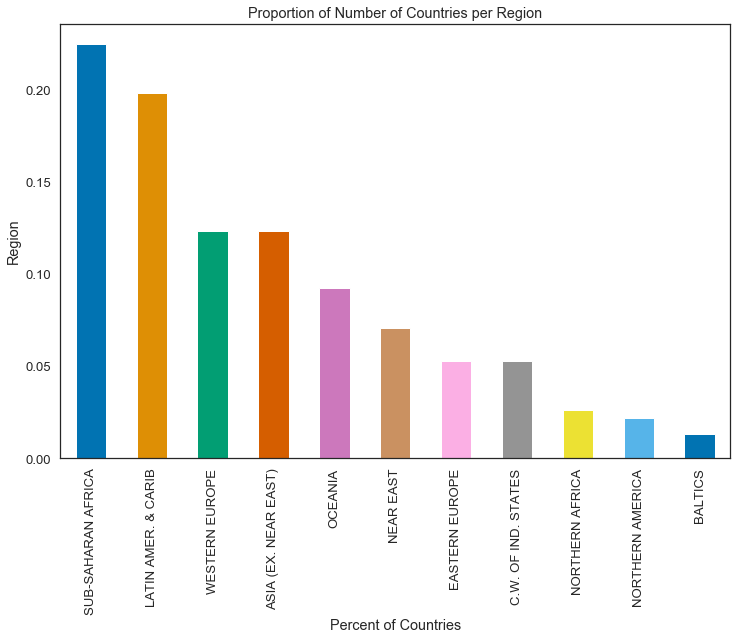

In [334]:
# Proportion of countries per region
(count_countries_per_region/df.shape[0]).plot(kind="bar", figsize=(12,8));
plt.title('Proportion of Number of Countries per Region')
plt.xlabel('Percent of Countries')
plt.ylabel('Region')
plt.show();

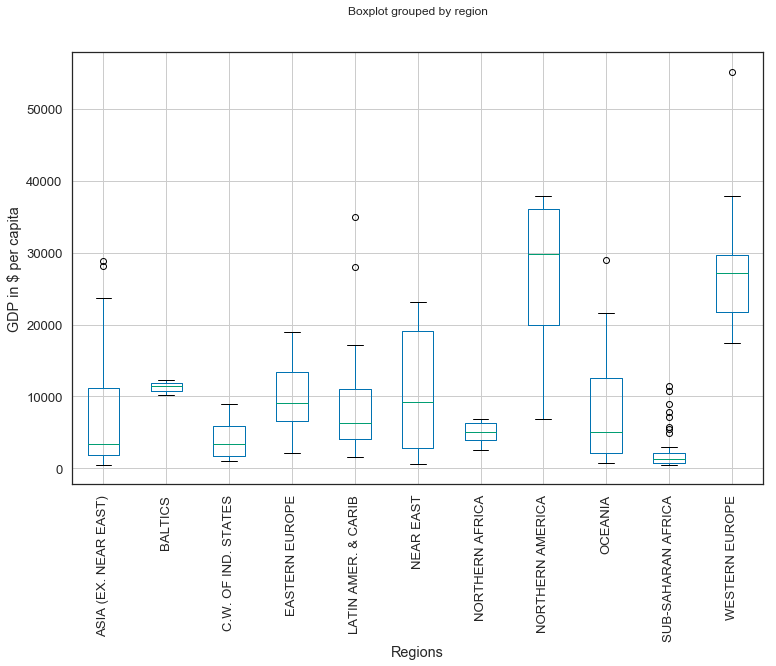

In [335]:
# GDP per region
df.boxplot(column='gdp', by='region', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Regions')
plt.ylabel('GDP in $ per capita')
plt.show();

In [336]:
# What countries belong to the NEAR EAST region?
df[df.region == "NEAR EAST"][['country']].sort_values(by=['country'], ascending=True)

,country
15,Bahrain
52,Cyprus
74,Gaza Strip
97,Iraq
100,Israel
105,Jordan
111,Kuwait
115,Lebanon
155,Oman
166,Qatar


In [337]:
# What countries belong to the C.W. OF IND. STATES region?
df[df.region == "C.W. OF IND. STATES"][['country']].sort_values(by=['country'], ascending=True)

,country
9,Armenia
13,Azerbaijan
18,Belarus
75,Georgia
106,Kazakhstan
112,Kyrgyzstan
137,Moldova
169,Russia
199,Tajikistan
207,Turkmenistan


To simplify, combine regions close to each other geographically and in terms of their GDP
- Europe: WESTERN EUROPE + EASTERN EUROPE + BALTICS  + C.W. OF IND. STATES (Belarus, Moldova, Ukraine)
- Africa: SUB-SAHARAN AFRICA + NORTHERN AFRICA
- Latin America and the Caribbean: LATIN AMER. & CARIB
- Northern America: NORTHERN AMERICA
- Asia: ASIA (EX. NEAR EAST) + C.W. OF IND. STATES (Armenia, Azarbaijan, Georgia, Kazakhstan, Kyrgyzstan, Russia, Tajikistan, Turkmenistan, Uzbekistan)
- Oceania: OCEANIA
- Middle East: NEAR EAST

In [338]:
df.loc[df.country == 'Ukraine', 'region2'] = 'Europe'

In [339]:
df[df.country == 'Ukraine']

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service,region2
211,Ukraine,C.W. OF IND. STATES,46710816.00,603700.00,77.40,0.46,-0.39,20.34,5400.00,99.70,259.90,56.21,1.61,3.00,8.82,14.39,0.19,0.45,0.36,Europe


In [340]:
# Remap new region definition to a new region2 column
mask = df.region == 'SUB-SAHARAN AFRICA'
df.loc[mask, 'region2'] = 'Africa'
mask = df.region == 'NORTHERN AFRICA'
df.loc[mask, 'region2'] = 'Africa'

mask = df.region == 'LATIN AMER. & CARIB'
df.loc[mask, 'region2'] = 'Latin America and the Caribbean'

mask = df.region == 'NORTHERN AMERICA'
df.loc[mask, 'region2'] = 'Northern America'

mask = df.region == 'ASIA (EX. NEAR EAST)'
df.loc[mask, 'region2'] = 'Asia'
mask = df.region == 'C.W. OF IND. STATES'
df.loc[mask, 'region2'] = 'Asia'

mask = df.region == 'OCEANIA'
df.loc[mask, 'region2'] = 'Oceania'

mask = df.region == 'NEAR EAST'
df.loc[mask, 'region2'] = 'Middle East'

mask = df.region == 'WESTERN EUROPE'
df.loc[mask, 'region2'] = 'Europe'
mask = df.region == 'EASTERN EUROPE'
df.loc[mask, 'region2'] = 'Europe'
mask = df.region == 'BALTICS'
df.loc[mask, 'region2'] = 'Europe'
df.loc[df.country == 'Belarus', 'region2'] = 'Europe'
df.loc[df.country == 'Moldova', 'region2'] = 'Europe'
df.loc[df.country == 'Ukraine', 'region2'] = 'Europe'

In [341]:
df.sample(10, random_state=rstate).T

,125,122,156,150,79,211,184,167,196,20
country,Malawi,Macau,Pakistan,Nicaragua,Greece,Ukraine,Singapore,Reunion,Switzerland,Belize
region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),ASIA (EX. NEAR EAST),LATIN AMER. & CARIB,WESTERN EUROPE,C.W. OF IND. STATES,ASIA (EX. NEAR EAST),SUB-SAHARAN AFRICA,WESTERN EUROPE,LATIN AMER. & CARIB
population,13013926.00,453125.00,165803560.00,5570129.00,10688058.00,46710816.00,4492150.00,787584.00,7523934.00,287730.00
area,118480.00,28.00,803940.00,129494.00,131940.00,603700.00,693.00,2517.00,41290.00,22966.00
popdensity,109.80,16183.00,206.20,43.00,81.00,77.40,6482.20,312.90,182.20,12.50
coast,0.00,146.43,0.13,0.70,10.37,0.46,27.85,8.22,0.00,1.68
netmigr,0.00,4.86,-2.77,-1.22,2.35,-0.39,11.53,0.00,4.05,0.00
infmortality,103.32,4.39,72.44,29.11,5.53,20.34,2.29,7.78,4.39,25.69
gdp,600.00,19400.00,2100.00,2300.00,20000.00,5400.00,23700.00,5800.00,32700.00,4900.00
literacy,62.70,94.50,45.70,67.50,97.50,99.70,92.50,88.90,99.00,94.10


In [342]:
# Check: What countries belong to the European region?
df[df.region2 == "Europe"][['country']].sort_values(by=['country'], ascending=True)

,country
1,Albania
4,Andorra
12,Austria
18,Belarus
19,Belgium
25,Bosnia & Herzegovina
30,Bulgaria
50,Croatia
53,Czech Republic
54,Denmark


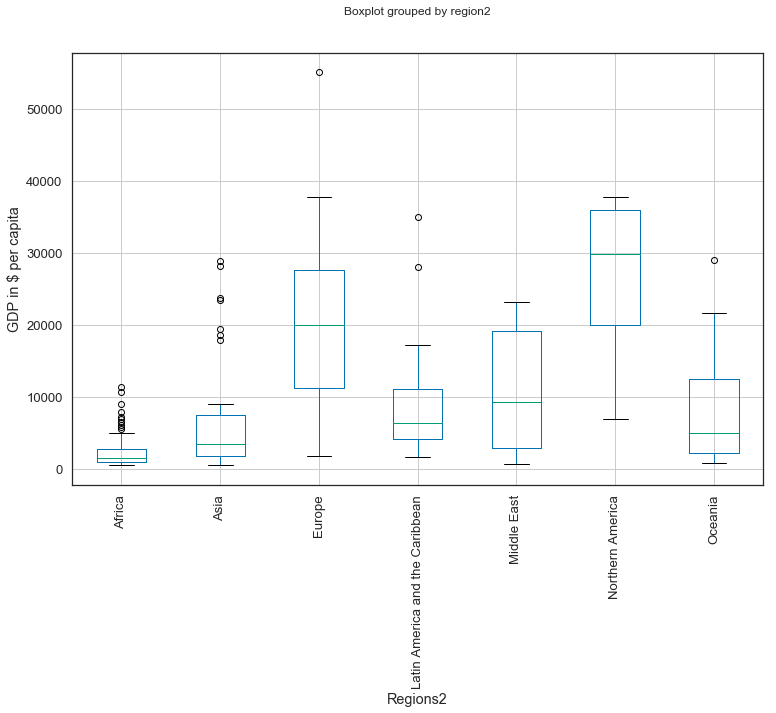

In [343]:
# GDPs per region2
df.boxplot(column='gdp', by='region2', figsize=(12,8));
plt.xticks(rotation=90);
plt.title('')
plt.xlabel('Regions2')
plt.ylabel('GDP in $ per capita')
plt.show();

In [344]:
# New regions by number of countries
df.groupby(['region2']).agg({'country':'count', 'population':'sum', 'area':'sum'}).sort_values(by=['country'], ascending=False)

,country,population,area
region2,,,
Africa,57,910844133.00,30360296.00
Europe,46,584910222.00,5882858.00
Latin America and the Caribbean,45,561824599.00,20544084.00
Asia,37,3906593251.00,44352412.00
Oceania,21,33131662.00,8519812.00
Middle East,16,195068377.00,4355586.00
Northern America,5,331672307.00,21782471.00


In [345]:
# Find out more about outliers
gpd_per_country_africa = df[df.region2 == "Africa"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_africa[gpd_per_country_africa.gdp > 3000]

,country,gdp
133,Mauritius,11400.00
189,South Africa,10700.00
26,Botswana,9000.00
182,Seychelles,7800.00
143,Namibia,7200.00
205,Tunisia,6900.00
118,Libya,6400.00
2,Algeria,6000.00
167,Reunion,5800.00
72,Gabon,5500.00


In [346]:
gpd_per_country_eur = df[df.region2 == "Europe"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_eur.head(2)

,country,gdp
121,Luxembourg,55100.00
154,Norway,37800.00


In [347]:
gpd_per_country_latin = df[df.region2 == "Latin America and the Caribbean"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_latin.head(3)

,country,gdp
38,Cayman Islands,35000.00
10,Aruba,28000.00
220,Virgin Islands,17200.00


In [348]:
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 10000]

,country,gdp
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00
122,Macau,19400.00
29,Brunei,18600.00
110,"Korea, South",17800.00


In [349]:
gpd_per_country_oceania = df[df.region2 == "Oceania"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_oceania.head(2)

,country,gdp
11,Australia,29000.00
149,New Zealand,21600.00


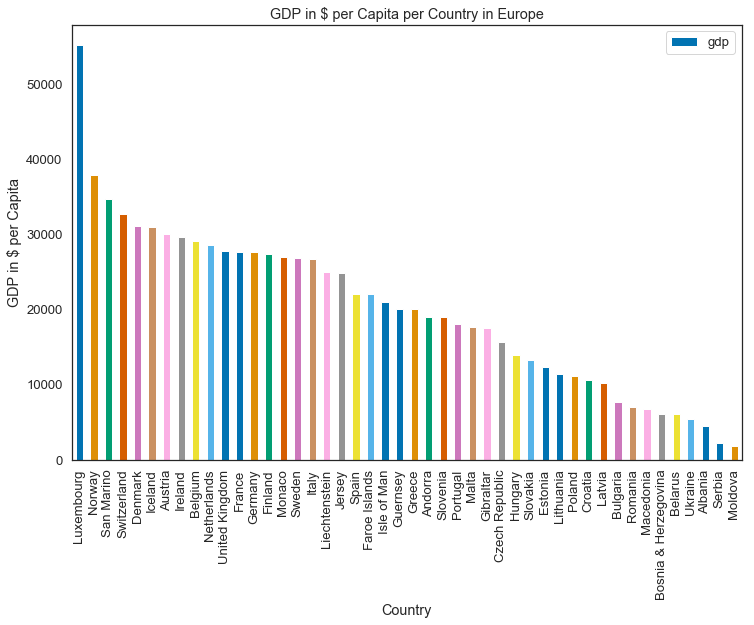

In [350]:
# GDP in $ per Capita per Country in Europe
gpd_per_country_eur.plot(x='country', y='gdp', kind="bar", figsize=(12,8));
plt.title('GDP in $ per Capita per Country in Europe')
plt.xlabel('Country')
plt.ylabel('GDP in $ per Capita')
plt.show();

Continue on missing values handling...

In [351]:
# Count mean European literacy
mean_eur = df[df.region2 == 'Europe']['literacy'].mean()
mean_eur

98.27804878048782

In [352]:
def impute_literacy_for_region2(df, name='Europe', mean=0):
    """Impute NaN literacy values for a region with a mean.

    Keyword arguments:
    df -- Pandas DataFrame
    name -- region column name
    mean -- mean value to be imputed
    """
    df['literacy'] = df.apply(
        lambda row: mean if np.isnan(row['literacy']) and row['region2'] == name else row['literacy'], 
        axis=1
    )
    
#impute_literacy_for_region2(df, name='Europe', mean=mean_eur)

In [353]:
# Impute European's mean to the European countries with NaN literacy
region = 'Europe'
mean_eur = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(df, name=region, mean=mean_eur)

In [354]:
region = 'Oceania'
mean_oce = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(df, name=region, mean=mean_oce)

In [355]:
region = 'Africa'
mean_afr = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(df, name=region, mean=mean_afr)

In [356]:
region = 'Latin America and the Caribbean'
mean_lat = df[df.region2 == region]['literacy'].mean()
impute_literacy_for_region2(df, name=region, mean=mean_lat)

In [357]:
df[df.country == "Gibraltar"]

,country,region,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,climate,birthrate,deathrate,agriculture,industry,service,region2
78,Gibraltar,WESTERN EUROPE,27928.00,7.00,3989.70,171.43,0.00,5.13,17500.00,98.28,877.70,0.00,0.00,nan,10.74,9.31,nan,nan,nan,Europe


In [358]:
df[df['region2'] == 'Europe'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(5)

,country,literacy
1,Albania,86.50
129,Malta,92.80
181,Serbia,93.00
164,Portugal,93.30
177,San Marino,96.00


In [359]:
# Fill all remaining Nan values with mean of columns
df.fillna(df.mean(), inplace=True)

In [360]:
# Remove 'climate' column as it is not clear how it is setup and its variability is low
df.drop('climate', axis=1, inplace=True)

In [361]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region2,0,0.00
gdp,0,0.00
region,0,0.00
population,0,0.00
area,0,0.00
popdensity,0,0.00
coast,0,0.00
netmigr,0,0.00
infmortality,0,0.00
literacy,0,0.00


In [362]:
# Save clean dataset
df.to_parquet('./data/countries of the world clean.parquet')

In [363]:
# Load clean dataset
df = pd.read_parquet('./data/countries of the world clean.parquet', engine='pyarrow')

In [364]:
df.head().T

,0,1,2,3,4
country,Afghanistan,Albania,Algeria,American Samoa,Andorra
region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE
population,31056997.00,3581655.00,32930091.00,57794.00,71201.00
area,647500.00,28748.00,2381740.00,199.00,468.00
popdensity,48.00,124.60,13.80,290.40,152.10
coast,0.00,1.26,0.04,58.29,0.00
netmigr,23.06,-4.93,-0.39,-20.71,6.60
infmortality,163.07,21.52,31.00,9.27,4.05
gdp,700.00,4500.00,6000.00,8000.00,19000.00
literacy,36.00,86.50,70.00,97.00,100.00


### Notes

1. The dataset has 20 variables and 227 observations (one per each country).
2. The dataset column names were standardized and their meaning described in the dataset dictionary.
3. There were no duplicated observations in the dataset.
4. The dataset column types were corrected. The quantitative values used colons insted of periods. This was corrected during dataset load.
5. Missing values were imputed (manually and with mean).
6. 2 columns were removed (other - not very meaningful name, climate - for too many missing values).
7. For the analysis, 7 regions have been selected based on the standard geographical regions.

## Data Modeling (Model)

This section's outcomes are used to build a model for predicting a GDP of a country based on world data set attributes.

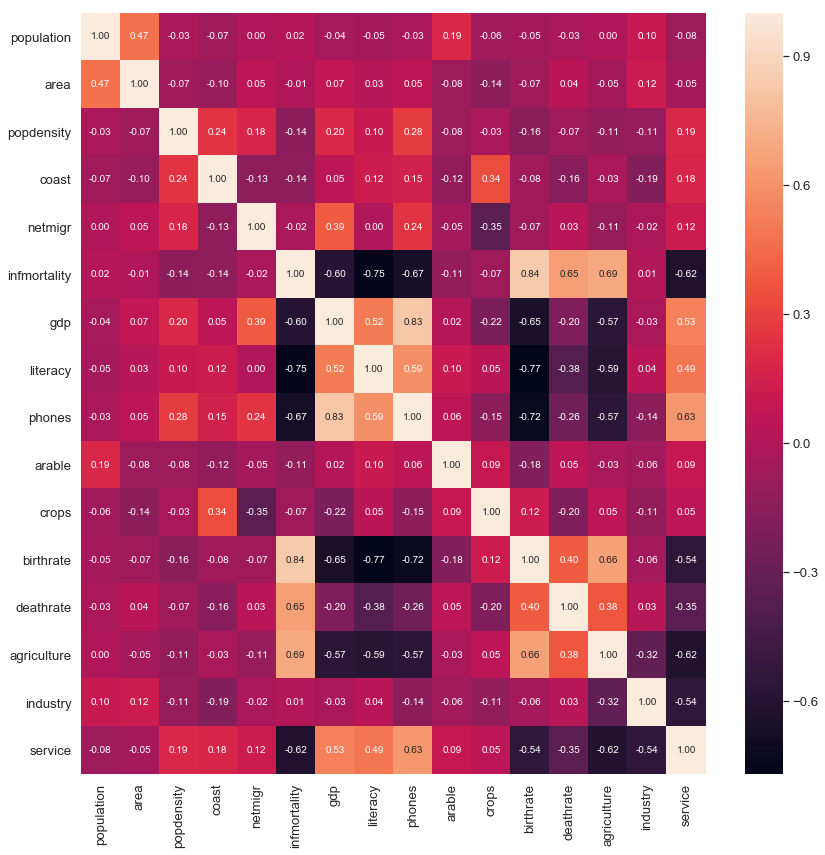

In [365]:
# How world data attributes are correlated?
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show();

In [366]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua & Barbuda,Argentina,Armenia
region,ASIA (EX. NEAR EAST),EASTERN EUROPE,NORTHERN AFRICA,OCEANIA,WESTERN EUROPE,SUB-SAHARAN AFRICA,LATIN AMER. & CARIB,LATIN AMER. & CARIB,LATIN AMER. & CARIB,C.W. OF IND. STATES
population,31056997.00,3581655.00,32930091.00,57794.00,71201.00,12127071.00,13477.00,69108.00,39921833.00,2976372.00
area,647500.00,28748.00,2381740.00,199.00,468.00,1246700.00,102.00,443.00,2766890.00,29800.00
popdensity,48.00,124.60,13.80,290.40,152.10,9.70,132.10,156.00,14.40,99.90
coast,0.00,1.26,0.04,58.29,0.00,0.13,59.80,34.54,0.18,0.00
netmigr,23.06,-4.93,-0.39,-20.71,6.60,0.00,10.76,-6.15,0.61,-6.47
infmortality,163.07,21.52,31.00,9.27,4.05,191.19,21.03,19.46,15.18,23.28
gdp,700.00,4500.00,6000.00,8000.00,19000.00,1900.00,8600.00,11000.00,11200.00,3500.00
literacy,36.00,86.50,70.00,97.00,100.00,42.00,95.00,89.00,97.10,98.60


In [367]:
# Select numerical features
df_num = df.select_dtypes(include = ['float64'])
df_num.head()

,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,birthrate,deathrate,agriculture,industry,service
0,31056997.00,647500.00,48.00,0.00,23.06,163.07,700.00,36.00,3.20,12.13,0.22,46.60,20.34,0.38,0.24,0.38
1,3581655.00,28748.00,124.60,1.26,-4.93,21.52,4500.00,86.50,71.20,21.09,4.42,15.11,5.22,0.23,0.19,0.58
2,32930091.00,2381740.00,13.80,0.04,-0.39,31.00,6000.00,70.00,78.10,3.22,0.25,17.14,4.61,0.10,0.60,0.30
3,57794.00,199.00,290.40,58.29,-20.71,9.27,8000.00,97.00,259.50,10.00,15.00,22.46,3.27,0.15,0.28,0.57
4,71201.00,468.00,152.10,0.00,6.60,4.05,19000.00,100.00,497.20,2.22,0.00,8.71,6.25,0.15,0.28,0.57


In [368]:
df_num.describe()

,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,crops,birthrate,deathrate,agriculture,industry,service
count,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00,227.00
mean,28740284.37,598226.96,379.05,21.17,-0.02,35.38,9658.15,83.35,236.06,13.80,4.56,22.11,9.24,0.15,0.28,0.57
std,117891326.54,1790282.24,1660.19,72.29,4.89,35.27,10038.23,19.39,225.97,12.98,8.32,11.10,4.95,0.14,0.13,0.16
min,7026.00,2.00,0.00,0.00,-20.99,2.29,500.00,17.60,0.20,0.00,0.00,7.29,2.29,0.00,0.02,0.06
25%,437624.00,4647.50,29.15,0.10,-1.02,8.11,1900.00,74.50,38.50,3.38,0.19,12.73,5.97,0.04,0.20,0.44
50%,4786994.00,86600.00,78.80,0.73,0.00,20.97,5500.00,92.50,181.60,10.53,1.08,18.90,8.17,0.12,0.28,0.57
75%,17497772.50,441811.00,190.15,10.34,0.98,55.90,15700.00,98.00,382.90,20.00,4.56,29.77,10.58,0.21,0.33,0.67
max,1313973713.00,17075200.00,16271.50,870.66,23.06,191.19,55100.00,100.00,1035.60,62.11,50.68,50.73,29.74,0.77,0.91,0.95


In [369]:
# Reveal some details about the numerical features
n = len(df_num)
for column in df_num:
    
    n_unique = len(df_num[column].unique())
    print('Feature: {}'.format(column))
    print('Enique values count: {}'.format(n_unique))
    print('Unique values ratio: {}'.format(n_unique / n))
    print('Missing values ratio: {}'.format(df_num[column].isnull().sum() / n))
    print('Median: {}'.format(df_num[column].median()))
    print('------------------------------------')
    
    print()

Feature: population
Enique values count: 227
Unique values ratio: 1.0
Missing values ratio: 0.0
Median: 4786994.0
------------------------------------

Feature: area
Enique values count: 226
Unique values ratio: 0.9955947136563876
Missing values ratio: 0.0
Median: 86600.0
------------------------------------

Feature: popdensity
Enique values count: 219
Unique values ratio: 0.9647577092511013
Missing values ratio: 0.0
Median: 78.8
------------------------------------

Feature: coast
Enique values count: 151
Unique values ratio: 0.6651982378854625
Missing values ratio: 0.0
Median: 0.73
------------------------------------

Feature: netmigr
Enique values count: 160
Unique values ratio: 0.7048458149779736
Missing values ratio: 0.0
Median: 0.0
------------------------------------

Feature: infmortality
Enique values count: 223
Unique values ratio: 0.9823788546255506
Missing values ratio: 0.0
Median: 20.97
------------------------------------

Feature: gdp
Enique values count: 130
Unique va

In [370]:
# Select categorical features
df_cat = df[list(set(df.columns) - set(df_num.columns))]
df_cat.head()

,region2,region,country
0,Asia,ASIA (EX. NEAR EAST),Afghanistan
1,Europe,EASTERN EUROPE,Albania
2,Africa,NORTHERN AFRICA,Algeria
3,Oceania,OCEANIA,American Samoa
4,Europe,WESTERN EUROPE,Andorra


In [371]:
# Reveal some information about categorical features
#feature_unique_values = {}
n = len(df_cat)
for column in df_cat:
    n_unique = len(df_cat[column].unique())
    #feature_unique_values[column] = n_unique
    print('---------------------')
    print('Feature name: {}'.format(column))
    print('Unique values count (including NaN): {}'.format(n_unique))
    if n_unique <= 5:
        print('Most frequent values:')
        print(df_cat.groupby(column).size())
    print('Variability ratio: {}'.format(n_unique / n))
    print('Values count (not null): {}'.format(df_cat[column].notnull().sum()))
    print('Values count (null): {}'.format(df_cat[column].isnull().sum()))
    print('Missing values ratio: {}'.format(df_cat[column].isnull().sum() / n))
    print()

---------------------
Feature name: region2
Unique values count (including NaN): 7
Variability ratio: 0.030837004405286344
Values count (not null): 227
Values count (null): 0
Missing values ratio: 0.0

---------------------
Feature name: region
Unique values count (including NaN): 11
Variability ratio: 0.048458149779735685
Values count (not null): 227
Values count (null): 0
Missing values ratio: 0.0

---------------------
Feature name: country
Unique values count (including NaN): 227
Variability ratio: 1.0
Values count (not null): 227
Values count (null): 0
Missing values ratio: 0.0



In [372]:
# Remove country and region2 from the prediction input
X = df.copy()
X.drop(columns=['country', 'region2'], inplace=True)

In [373]:
# One-hot-encoding
X = pd.get_dummies(X, columns=['region'])

In [374]:
X.head(5)

,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,31056997.00,647500.00,48.00,0.00,23.06,163.07,700.00,36.00,3.20,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655.00,28748.00,124.60,1.26,-4.93,21.52,4500.00,86.50,71.20,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091.00,2381740.00,13.80,0.04,-0.39,31.00,6000.00,70.00,78.10,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794.00,199.00,290.40,58.29,-20.71,9.27,8000.00,97.00,259.50,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201.00,468.00,152.10,0.00,6.60,4.05,19000.00,100.00,497.20,2.22,...,0,0,0,0,0,0,0,0,0,1


In [375]:
# Data scaling
# Rescale data between 0 and 1
x = X.values #returns a numpy array
x

array([[3.1056997e+07, 6.4750000e+05, 4.8000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5816550e+06, 2.8748000e+04, 1.2460000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2930091e+07, 2.3817400e+06, 1.3800000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.1456188e+07, 5.2797000e+05, 4.0600000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1502010e+07, 7.5261400e+05, 1.5300000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2236805e+07, 3.9058000e+05, 3.1300000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [376]:
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
cols = X.columns
X = pd.DataFrame(x_scaled, columns=cols)
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
population,0.02,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.03,0.00
area,0.04,0.00,0.14,0.00,0.00,0.07,0.00,0.00,0.16,0.00
popdensity,0.00,0.01,0.00,0.02,0.01,0.00,0.01,0.01,0.00,0.01
coast,0.00,0.00,0.00,0.07,0.00,0.00,0.07,0.04,0.00,0.00
netmigr,1.00,0.36,0.47,0.01,0.63,0.48,0.72,0.34,0.49,0.33
infmortality,0.85,0.10,0.15,0.04,0.01,1.00,0.10,0.09,0.07,0.11
gdp,0.00,0.07,0.10,0.14,0.34,0.03,0.15,0.19,0.20,0.05
literacy,0.22,0.84,0.64,0.96,1.00,0.30,0.94,0.87,0.96,0.98
phones,0.00,0.07,0.08,0.25,0.48,0.01,0.44,0.53,0.21,0.19
arable,0.20,0.34,0.05,0.16,0.04,0.04,0.00,0.29,0.20,0.28


In [377]:
# What is the relationship between variables - linear or not.

# Identify correlations between numeric features
def correlated_columns_to_drop(df, min_corr_level=0.95):
    """Identify columns with a minimum correlation level to be removed from modeling.

    Keyword arguments:
    df -- Pandas DataFrame
    min_corr_level -- user-defined cut-off correlation level
    """

    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than min_corr_level
    to_drop = [column for column in upper.columns if any(upper[column] > min_corr_level)]

    return to_drop

In [378]:
columns_to_drop = correlated_columns_to_drop(X, 0.95)

In [379]:
columns_to_drop

[]

In [380]:
# Save clean dataset
X.to_parquet('./data/countries of the world ready for modeling.parquet')

In [381]:
# Load clean dataset
X = pd.read_parquet('./data/countries of the world ready for modeling.parquet', engine='pyarrow')

In [382]:
X.head(10)

,population,area,popdensity,coast,netmigr,infmortality,gdp,literacy,phones,arable,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,0.02,0.04,0.00,0.00,1.00,0.85,0.00,0.22,0.00,0.20,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.01,0.00,0.36,0.10,0.07,0.84,0.07,0.34,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.03,0.14,0.00,0.00,0.47,0.15,0.10,0.64,0.08,0.05,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.02,0.07,0.01,0.04,0.14,0.96,0.25,0.16,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.00,0.00,0.01,0.00,0.63,0.01,0.34,1.00,0.48,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5,0.01,0.07,0.00,0.00,0.48,1.00,0.03,0.30,0.01,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
6,0.00,0.00,0.01,0.07,0.72,0.10,0.15,0.94,0.44,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.01,0.04,0.34,0.09,0.19,0.87,0.53,0.29,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.03,0.16,0.00,0.00,0.49,0.07,0.20,0.96,0.21,0.20,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.01,0.00,0.33,0.11,0.05,0.98,0.19,0.28,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Notes

1. The numerical features have different ranges and should be scaled.
2. The country variable should not be used in the prediction as it has unique values across the dataset.
3. The region categorical variable will be used as it is originally present in the dataset. The region2 variable will be ommited in predictive modeling.
4. There is no colinearity between input variables on the level of 0.95 or more. 

## Evaluate the Result (Analyze & Visualize)

### 1. Wealthy vs. Poor Regions: What are the Differences?
There is one simgle measure of prosperity used in today's economy: GDP (Gross Domestic Product). In our case, GDP is reflected in U.S. dollars per capita. It represents the value of all final goods and services produced within a nation in a given year (2013 in our case), converted at market exchange rates to current U.S. dollars, divided by the average population for the same year.

In [383]:
# Median regions' GDP
df_gdp = pd.DataFrame(df.groupby('region2').median()['gdp'].sort_values(ascending=False))
df_gdp.index.name = 'Region'
df_gdp.columns = ['Median GDP Per Capita in U.S. Dollars']
df_gdp

,Median GDP Per Capita in U.S. Dollars
Region,
Northern America,29800.00
Europe,20000.00
Middle East,9250.00
Latin America and the Caribbean,6300.00
Oceania,5000.00
Asia,3400.00
Africa,1400.00


Looking at the world's GDP per capita, we can cluster two groups of regions with a cut at GDP level of 10000: wealthier ones (Northern America and Europe) and poorer ones (Middle East, Latin America and the Caribbean, Oceania, Asia, Africa). In the poorer regions there are also wealthy countries (like Australia in Oceania with GDP of 29000 or Hong Kong and Japan in Asia with GDP above 28000) that is why focusing on a question related to poorer countries in regions, I have used median which is less prone to outliers. Let's call the wealthier regions Group A and the rest Group B.

Going further, some interesting questions arise: What are the distinguishing traits of wealthy (A) and poor (B) regions? What should the poor regions focus on to become wealthier? Let's find out what our data say.

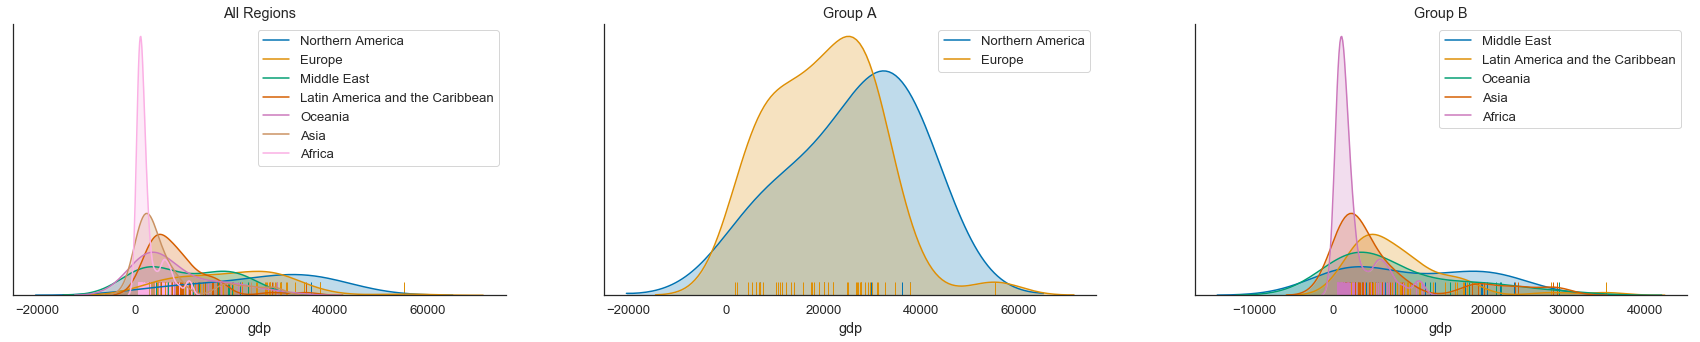

In [384]:
def plot_regions_comparison(attribute='gdp'):
    """Plot regions comparison for a specific attribute.

    Keyword arguments:
    attribute -- dataset attribute to be compared among regions
    """
    sns.set(style="white", font_scale=1.2, palette='colorblind')
    f, axes = plt.subplots(1, 3, figsize=(30, 5))

    sns.despine()

    # World
    g = sns.distplot(df[df['region2'] == 'Northern America'][attribute], label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Europe'][attribute], label='Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Middle East'][attribute], label='Middle East', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'][attribute], label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Oceania'][attribute], label='Oceania', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Asia'][attribute], label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])
    sns.distplot(df[df['region2'] == 'Africa'][attribute], label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[0])

    g.set(yticklabels=[])
    g.set(title='All Regions')
    #g.legend(loc='upper right')

    # Wealthy Regions
    g = sns.distplot(df[df['region2'] == 'Northern America'][attribute], label='Northern America', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])
    sns.distplot(df[df['region2'] == 'Europe'][attribute], label='Europe', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[1])

    g.set(yticklabels=[])
    g.set(title='Group A')

    # Poor Regions
    g = sns.distplot(df[df['region2'] == 'Middle East'][attribute], label='Middle East', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Latin America and the Caribbean'][attribute], label='Latin America and the Caribbean', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Oceania'][attribute], label='Oceania', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Asia'][attribute], label='Asia', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])
    sns.distplot(df[df['region2'] == 'Africa'][attribute], label='Africa', hist=False, rug=True, kde_kws={"shade":True}, ax=axes[2])

    g.set(yticklabels=[])
    g.set(title='Group B')

    plt.savefig("./pics/{}.png".format(attribute), dpi=300);
    plt.show();
    
plot_regions_comparison('gdp')


In [385]:
# GDP in the North America
gpd_per_country_namerica = df[df.region2 == "Northern America"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_namerica

,country,gdp
214,United States,37800.00
22,Bermuda,36000.00
36,Canada,29800.00
80,Greenland,20000.00
174,St Pierre & Miquelon,6900.00


In [386]:
# Wealthest Asia countries
gpd_per_country_asia = df[df.region2 == "Asia"][['country', 'gdp']].sort_values(by=['gdp'], ascending=False)
gpd_per_country_asia[gpd_per_country_asia.gdp > 20000]

,country,gdp
91,Hong Kong,28800.00
103,Japan,28200.00
184,Singapore,23700.00
198,Taiwan,23400.00


Within the Group A regions, Eastern European countries are the poorest ones which is represented by a hump in the left slope of the Europe's distribution. North America countries seem to be more left skewed towards higher GDP. The majority of Group A countries have GDP above 20000. The The Luxemburg's GDP of 55100 stays above all. This is a very good result for this small European country. 

The Group B regions tend to have right-skewed distributions of countries' GDP with Africa having the lowest GDP of all, then Asia and the best of them Middle East. The long right tail represents the wealthier countries withing the poorer regions like Australia, Hong Kong, Japan or Singapure having GDP on the European level. For the Group B regions, we will focus on poorer countries only to see what should be their economical focus in order to catch up the Group A regions or leading countries within Group B.

So, what are exactly the differences in the world's data regarding wealthier and poorer regions? Let's find out by comparing selected economic attributes: literacy, agriculture, industry, and service. 

#### Literacy

Literacy is the ability to read and write.

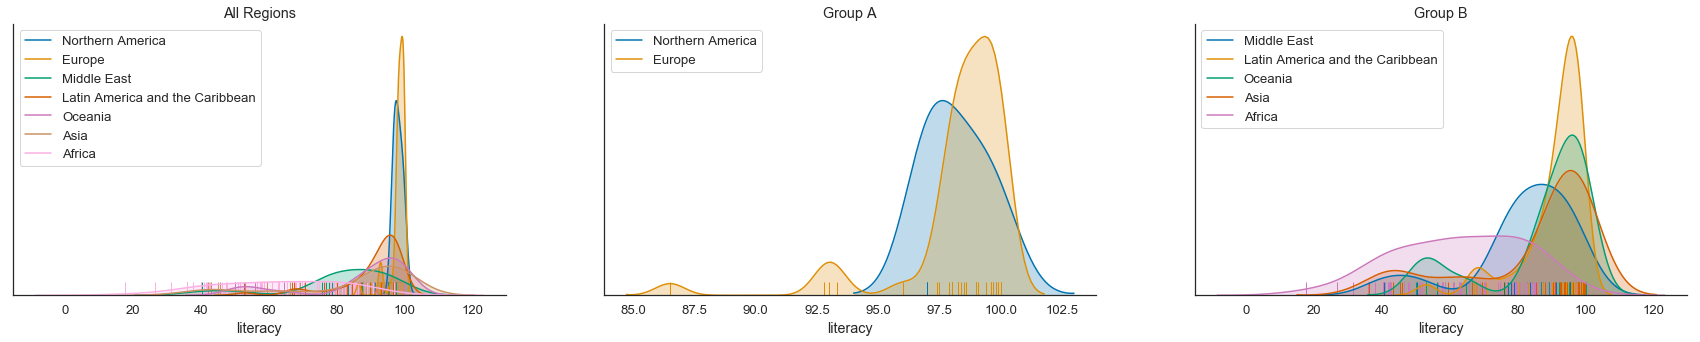

In [387]:
plot_regions_comparison('literacy')

In [388]:
df[df['region2'] == 'Europe'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(5)

,country,literacy
1,Albania,86.50
129,Malta,92.80
181,Serbia,93.00
164,Portugal,93.30
177,San Marino,96.00


In [389]:
df[df['region2'] == 'Africa'][['country', 'literacy']].sort_values(by=['literacy'], ascending=True).head(10)

,country,literacy
151,Niger,17.60
31,Burkina Faso,26.60
183,Sierra Leone,31.40
86,Guinea,35.90
188,Somalia,37.80
73,"Gambia, The",40.10
180,Senegal,40.20
21,Benin,40.90
132,Mauritania,41.70
5,Angola,42.00


In [390]:
df[df['region2'] == 'Asia'][['country', 'literacy']].sort_values(by=['literacy'], ascending=False).head(10)

,country,literacy
169,Russia,99.60
199,Tajikistan,99.40
216,Uzbekistan,99.30
75,Georgia,99.00
109,"Korea, North",99.00
103,Japan,99.00
9,Armenia,98.60
106,Kazakhstan,98.40
207,Turkmenistan,98.00
110,"Korea, South",97.90


Literacy seems to be one of the big differentiators. Group A regions has literacy level above 85% of the population with the worst results by Albania (86.5%), Malta (92.80%) and Serbia (93%), whereas Group B starts from 17.5% (Niger) and many other African, Middle East or Oceania countries way below 80%.

The Group B should focus on improving education level of their population leading to more innovative societes. More educated people would have easier access to knowledge (the Internet, books). It would be easier to them to exchange and implement other nations' ideas leading to prosperity and further educational growth.

#### Agriculture

The agriculture world data indicator is percentage of GDP sector composition ratio for agriculture economy sector. Agriculture indicator, together with the other two: Industry and Service, constitute 100% of GDP of a country.

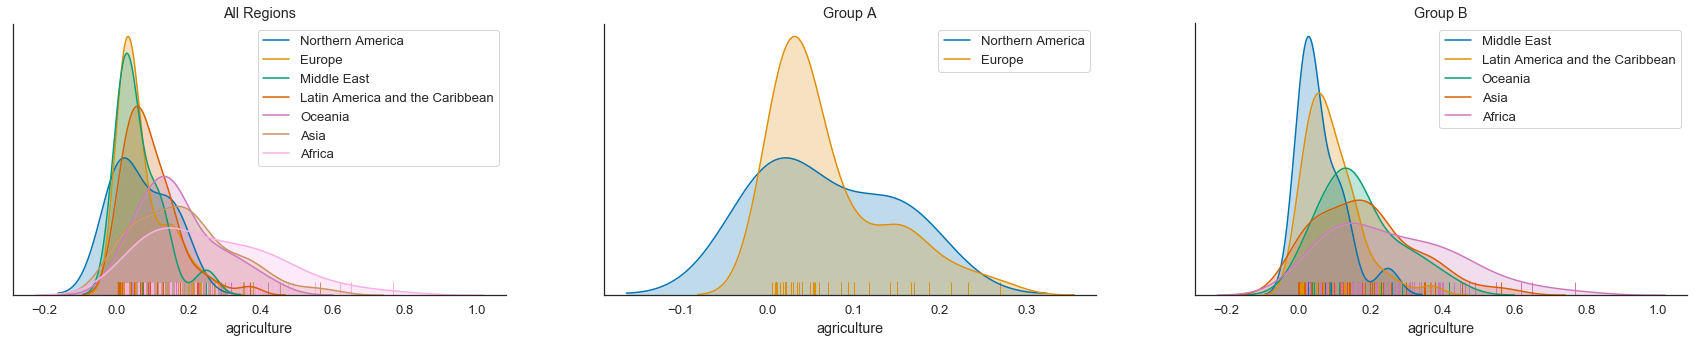

In [391]:
plot_regions_comparison('agriculture')

In [392]:
df[df['region2'] == 'Northern America'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=True)

,country,agriculture
22,Bermuda,0.01
214,United States,0.01
36,Canada,0.02
80,Greenland,0.15
174,St Pierre & Miquelon,0.15


In [393]:
df[df['region2'] == 'Europe'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=True)

,country,agriculture
213,United Kingdom,0.01
76,Germany,0.01
19,Belgium,0.01
121,Luxembourg,0.01
99,Isle of Man,0.01
195,Sweden,0.01
196,Switzerland,0.01
12,Austria,0.02
54,Denmark,0.02
154,Norway,0.02


In [394]:
df[df['region2'] == 'Africa'][['country', 'agriculture']].sort_values(by=['agriculture'], ascending=False).head(10)

,country,agriculture
117,Liberia,0.77
188,Somalia,0.65
87,Guinea-Bissau,0.62
39,Central African Rep.,0.55
45,"Congo, Dem. Rep.",0.55
183,Sierra Leone,0.49
65,Ethiopia,0.47
33,Burundi,0.46
128,Mali,0.45
35,Cameroon,0.45


Agriculture in more developed countries takes only a fraction of a small portion of their GDP per capita. All Group A countries have agriculture indicator value below 27% with the more developed countries below the ratio of 5%.

In the Group B, we can notice that the percentage of GDP agriculture ration is more significant. Countries like Liberia (77%), Somallia (65%) or Guinea-Bissau (62%) take the lead here.

The low ratio does not necessarily mean that more developed countries have worse agriculture indicators, it rather means that other economy sectors (Industry or Service) take precedence in influencing their GDP being more profitable comparing to agriculture.

The Group B countries should focus on developing innovative industry and service sector to become more competitive. Having stronger industry and service sectors would also influence positively agriculture with more modern, productive an healhty treatment. 

#### Industry

The Industry indicator shows the percentage of GDP sector composition ratio for industry economy sector.

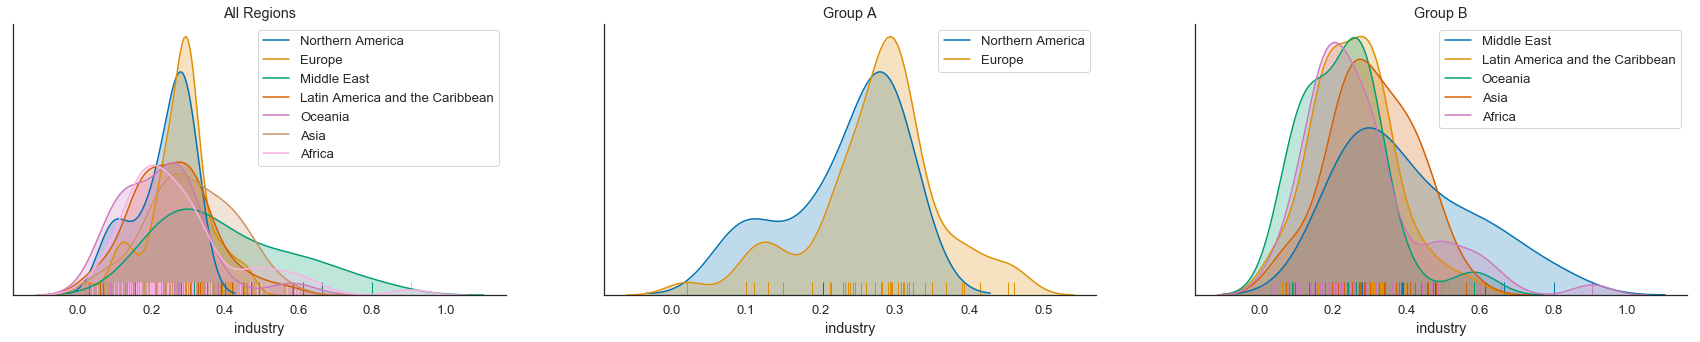

In [395]:
plot_regions_comparison('industry')

In [396]:
df[df['region2'] == 'Europe'][['country', 'industry']].sort_values(by=['industry'], ascending=True)

,country,industry
104,Jersey,0.02
85,Guernsey,0.10
66,Faroe Islands,0.11
121,Luxembourg,0.13
99,Isle of Man,0.13
93,Iceland,0.15
1,Albania,0.19
79,Greece,0.21
69,France,0.21
129,Malta,0.23


In [397]:
a1 = df[df['region2'] == 'Europe'][['country', 'industry']].sort_values(by=['industry'], ascending=True).mean()
a1[0]

0.2745400783020812

In [398]:
df[df['region2'] == 'Northern America'][['country', 'industry']].sort_values(by=['industry'], ascending=True)

,country,industry
22,Bermuda,0.10
214,United States,0.20
80,Greenland,0.28
174,St Pierre & Miquelon,0.28
36,Canada,0.29


In [399]:
a2 = df[df['region2'] == 'Northern America'][['country', 'industry']].sort_values(by=['industry'], ascending=True).mean()
a2[0]

0.23268436018957347

In [400]:
(a1[0]+a2[0])/2

0.25361221924582733

In [401]:
df[df['region2'] == 'Africa'][['country', 'industry']].sort_values(by=['industry'], ascending=True).head(200)

,country,industry
44,Comoros,0.04
117,Liberia,0.05
65,Ethiopia,0.10
188,Somalia,0.10
45,"Congo, Dem. Rep.",0.11
87,Guinea-Bissau,0.12
21,Benin,0.14
73,"Gambia, The",0.14
178,Sao Tome & Principe,0.15
125,Malawi,0.16


In [402]:
df[df['region2'] == 'Asia'][['country', 'industry']].sort_values(by=['industry'], ascending=True).head(200)

,country,industry
122,Macau,0.07
32,Burma,0.08
91,Hong Kong,0.09
127,Maldives,0.18
16,Bangladesh,0.20
112,Kyrgyzstan,0.21
145,Nepal,0.21
139,Mongolia,0.21
216,Uzbekistan,0.23
58,East Timor,0.23


In [403]:
df[df['region2'] == 'Middle East'][['country', 'industry']].sort_values(by=['industry'], ascending=True).head(200)

,country,industry
52,Cyprus,0.20
115,Lebanon,0.21
197,Syria,0.23
222,West Bank,0.28
74,Gaza Strip,0.28
105,Jordan,0.29
206,Turkey,0.30
100,Israel,0.32
15,Bahrain,0.39
155,Oman,0.39


In [404]:
df[df['region2'] == 'Oceania'][['country', 'industry']].sort_values(by=['industry'], ascending=True).head(200)

,country,industry
148,New Caledonia,0.09
47,Cook Islands,0.10
187,Solomon Islands,0.11
217,Vanuatu,0.12
157,Palau,0.12
67,Fiji,0.14
130,Marshall Islands,0.15
136,"Micronesia, Fed. St.",0.15
71,French Polynesia,0.19
108,Kiribati,0.24


In [405]:
# Calculate mean for Group B countries
array = ['Oceania', 'Asia', 'Middle East', 'Latin America and the Caribbean', 'Africa']
df.loc[df['region2'].isin(array)].industry.mean()
#df.loc[df['region2'].isin(array)].industry.median()

0.28626766479965543

Within groups, the data distributions overlap significantly meaning the economies of the regions in terms of industry sector are within similar range (with a mean of 0.25 for Group A and 0.28 for Group B). Between the two groups, most of countries have similar values ranging from 2% (Jersey) to 50% (Ireland), nevertheless there is a long right tail within the Group B countires showing countries with the metric above 50%, like Samoa, (58%), Angola (66%), Qatar (80%) or Equatorial Guinea (91%).

From this high-level and simplified analysis, one could derive that more service-oriented economy would be the proposed direction for above 40% countries. The strong industry indicator in Group B countries may indicate that these countries are already on their way to get there, because the service-centric economies are also related to wealthier nations (positive correlation of 0.51 between GDP and Service economic factor). One way of becoming wealthier as a nation is to start with a strong industry sector.

#### Service

A service economy is a nation that generates more value from services than other sectors such as agriculture and manufacturing.

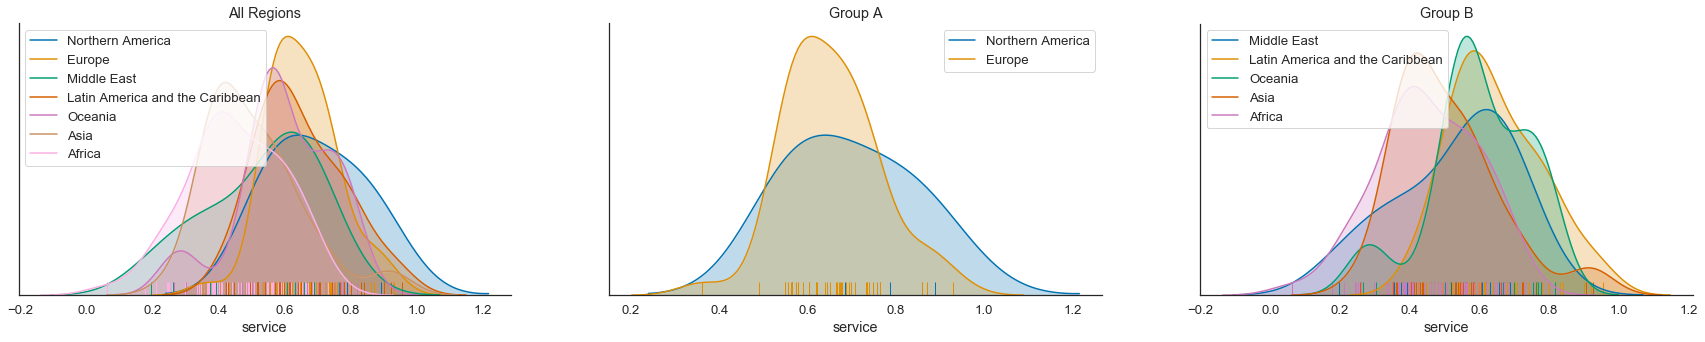

In [406]:
plot_regions_comparison('service')

In [407]:
df[df['region2'] == 'Europe'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
211,Ukraine,0.36
98,Ireland,0.49
168,Romania,0.55
119,Liechtenstein,0.55
25,Bosnia & Herzegovina,0.55
137,Moldova,0.56
123,Macedonia,0.56
154,Norway,0.56
4,Andorra,0.57
138,Monaco,0.57


In [408]:
df[df['region2'] == 'Northern America'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
80,Greenland,0.57
174,St Pierre & Miquelon,0.57
36,Canada,0.68
214,United States,0.79
22,Bermuda,0.89


In [409]:
df[df['region2'] == 'Asia'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
113,Laos,0.26
34,Cambodia,0.35
32,Burma,0.35
109,"Korea, North",0.36
23,Bhutan,0.36
0,Afghanistan,0.38
219,Vietnam,0.38
13,Azerbaijan,0.40
42,China,0.40
29,Brunei,0.40


In [410]:
df[df['region2'] == 'Africa'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
62,Equatorial Guinea,0.06
117,Liberia,0.18
183,Sierra Leone,0.21
152,Nigeria,0.24
5,Angola,0.25
188,Somalia,0.25
39,Central African Rep.,0.25
87,Guinea-Bissau,0.26
2,Algeria,0.30
33,Burundi,0.33


In [411]:
df[df['region2'] == 'Oceania'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
159,Papua New Guinea,0.27
176,Samoa,0.30
187,Solomon Islands,0.47
203,Tonga,0.50
130,Marshall Islands,0.53
136,"Micronesia, Fed. St.",0.56
209,Tuvalu,0.56
3,American Samoa,0.57
153,N. Mariana Islands,0.57
221,Wallis and Futuna,0.57


In [412]:
df[df['region2'] == 'Middle East'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
166,Qatar,0.20
97,Iraq,0.26
179,Saudi Arabia,0.35
212,United Arab Emirates,0.38
224,Yemen,0.39
111,Kuwait,0.52
197,Syria,0.52
155,Oman,0.58
206,Turkey,0.58
15,Bahrain,0.61


In [413]:
df[df['region2'] == 'Latin America and the Caribbean'][['country', 'service']].sort_values(by=['service'], ascending=True)

,country,service
204,Trinidad & Tobago,0.42
88,Guyana,0.43
41,Chile,0.45
56,Dominica,0.49
27,Brazil,0.52
89,Haiti,0.52
24,Bolivia,0.52
43,Colombia,0.53
165,Puerto Rico,0.54
218,Venezuela,0.54


Advanced economies are locked in a long term trend whereby services are becoming a greater percentage of economic output. In Europe, the least service developed economy is Ukraine (36%), in Northern America St. Pierre & Miquelon (57%). In Asia the index starts with the value of 0.26 (Laos), in Oceania 0.27 (Papua New Guinea), in Africa with 0.06 (Equatorial Guinea), Middle East with 0.20 (Qatar) and Latin America and the Caribbean with 0.42 (Trinidad & Tobago).

On the other side most service-oriented countries (in both Groups) are represented with values from above 70%.

### Conclusion

To summarize, the most successful regions in terms of wealth (GDP per capita) are (almost) 100% literate. Their nations seem to be more uniform in terms of the indicators. They have very strong service focused economy ratio and depending on different factors (like geography or size) their second characteristics are more agriculture or industry oriented. 

The poorer regions, although having very stron nations as representatives (Australia, Japan, Hong Kong, to name a few) are more varied with a significant portion of countries with agriculture or industral economies and much work to do in terms of improving their nations' literacy.

In order to catch up, the Group B regions should focus on education to speed up the development process and take the best technologies, environment-friendly approaches and economical mindsets from the Group A regions (plus leading nations in terms of GDP from Group B). In most cases they might have to take a long journey from pure agricultural societes, through industrial ones to the ones where the service sector plays the main role.

As a last note, it is interesting to see how different regions on the same continent can be internally. For example, considering Europe, the West European countries have generally better GDP indicators than East European countires, which is due to longer period of prosperity, democratic or republic systems and consideration for the law. This draws the conclussion that in greater pace and chance of achieving success in building economical prosperity cultural, social and especially political situation plays an important role.

### 2. What can we do to limit infant mortality?

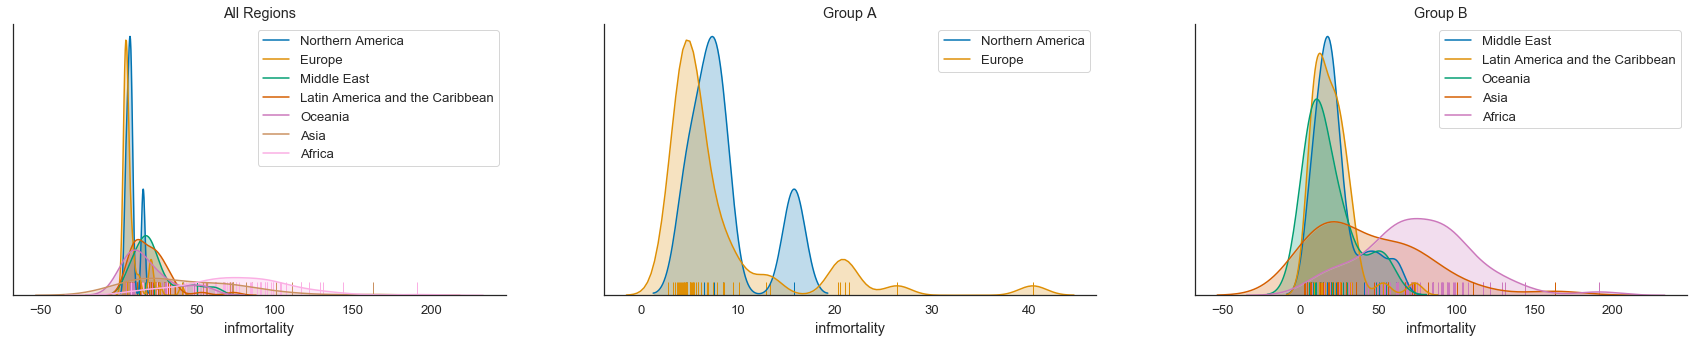

In [414]:
plot_regions_comparison('infmortality')

In [415]:
df[df['region2'] == 'Middle East'][['country', 'infmortality']].sort_values(by=['infmortality'], ascending=True)

,country,infmortality
100,Israel,7.03
52,Cyprus,7.18
111,Kuwait,9.95
179,Saudi Arabia,13.24
212,United Arab Emirates,14.51
15,Bahrain,17.27
105,Jordan,17.35
166,Qatar,18.61
155,Oman,19.51
222,West Bank,19.62


In [416]:
df[df['region2'] == 'Africa'][['country', 'infmortality']].sort_values(by=['infmortality'], ascending=True)

,country,infmortality
167,Reunion,7.78
133,Mauritius,15.03
182,Seychelles,15.53
171,Saint Helena,19.00
118,Libya,24.60
205,Tunisia,24.77
2,Algeria,31.00
60,Egypt,32.59
141,Morocco,41.62
178,Sao Tome & Principe,43.11


In [417]:
df[df['region2'] == 'Asia'][['country', 'infmortality']].sort_values(by=['infmortality'], ascending=True)

,country,infmortality
184,Singapore,2.29
91,Hong Kong,2.97
103,Japan,3.26
122,Macau,4.39
198,Taiwan,6.40
110,"Korea, South",7.05
29,Brunei,12.61
191,Sri Lanka,14.35
169,Russia,15.39
126,Malaysia,17.70


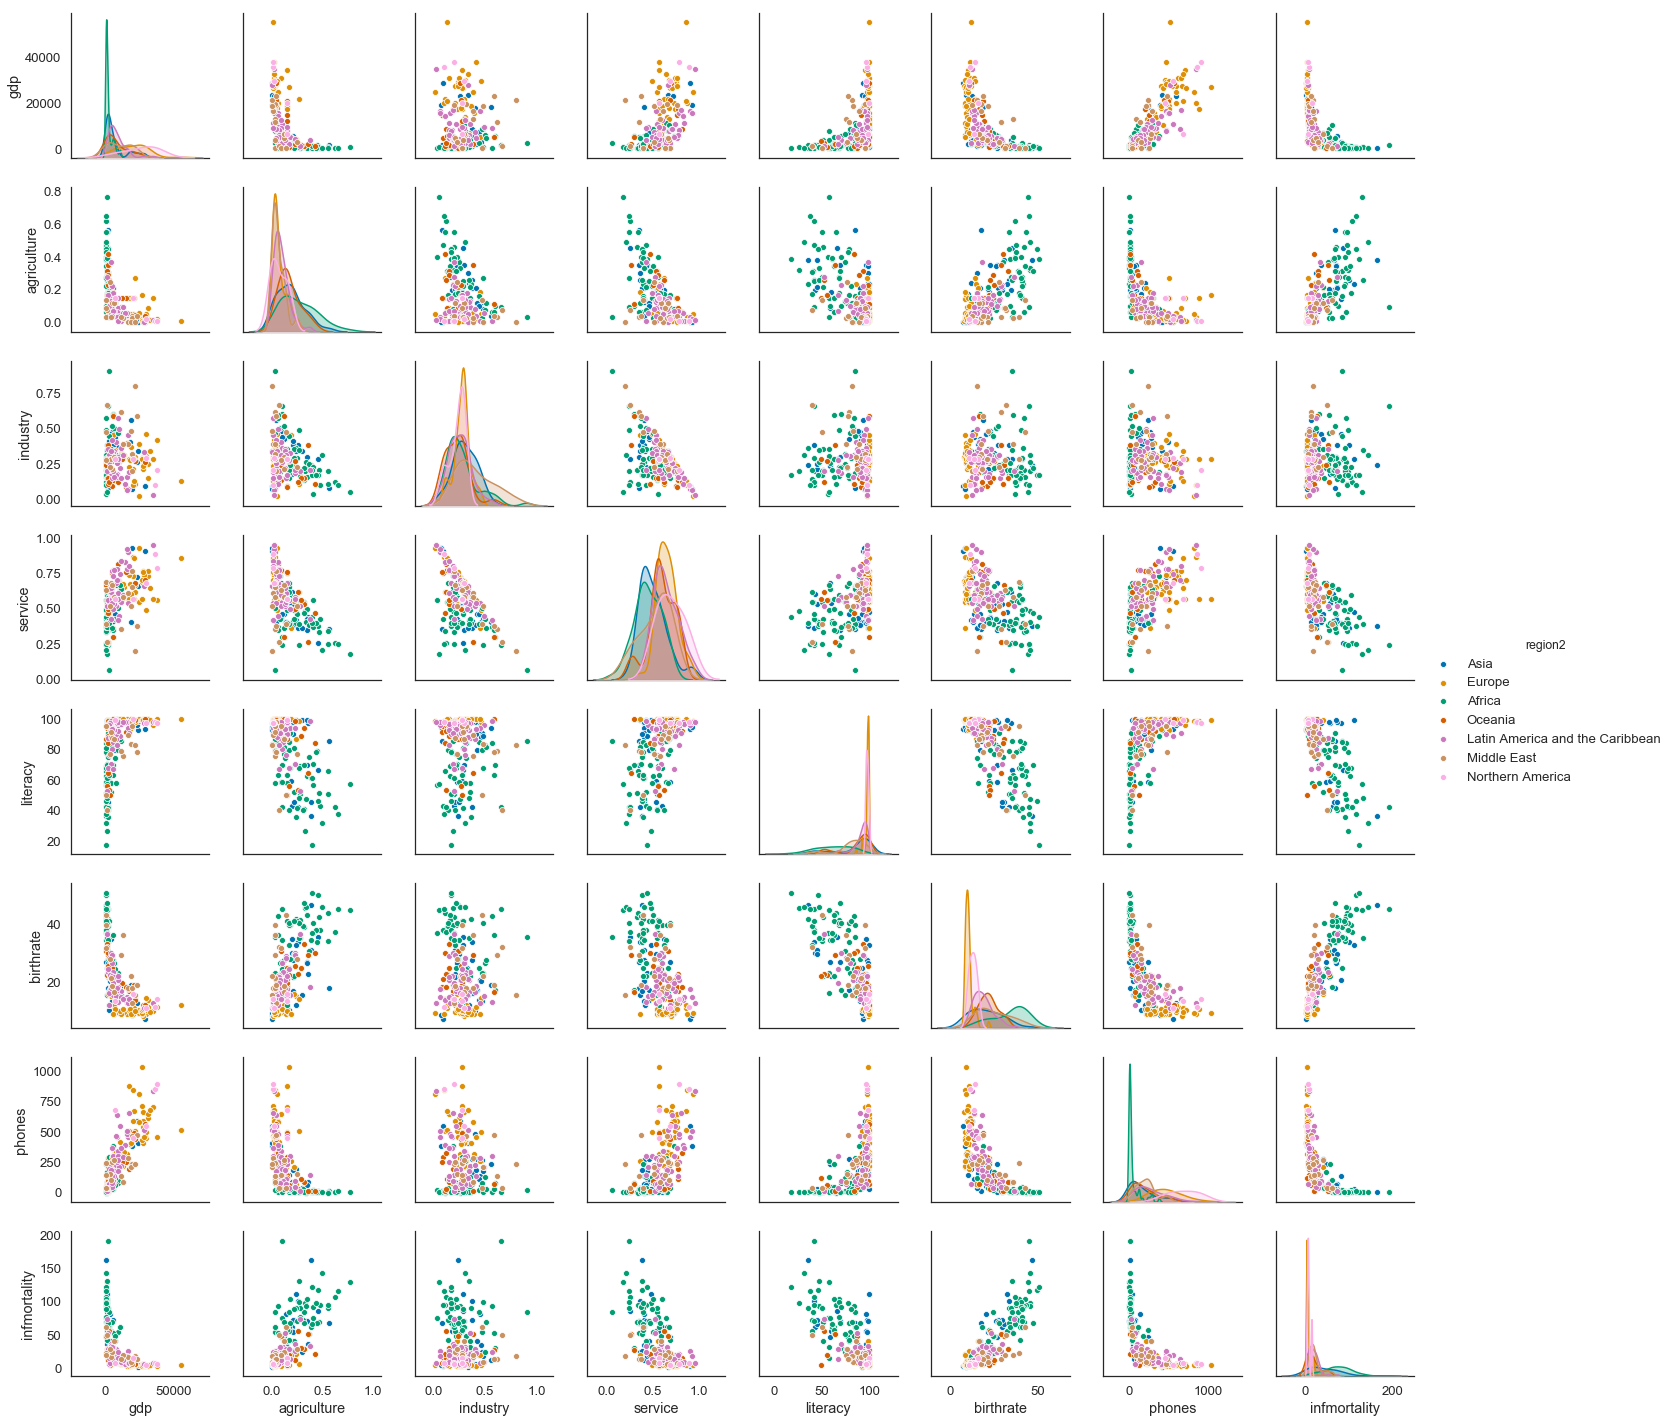

In [418]:
x = df.loc[:, ["region2", "gdp", "agriculture", "industry", "service", "literacy", "birthrate", "phones", "infmortality"]]
sns.pairplot(x, hue="region2", palette="colorblind");

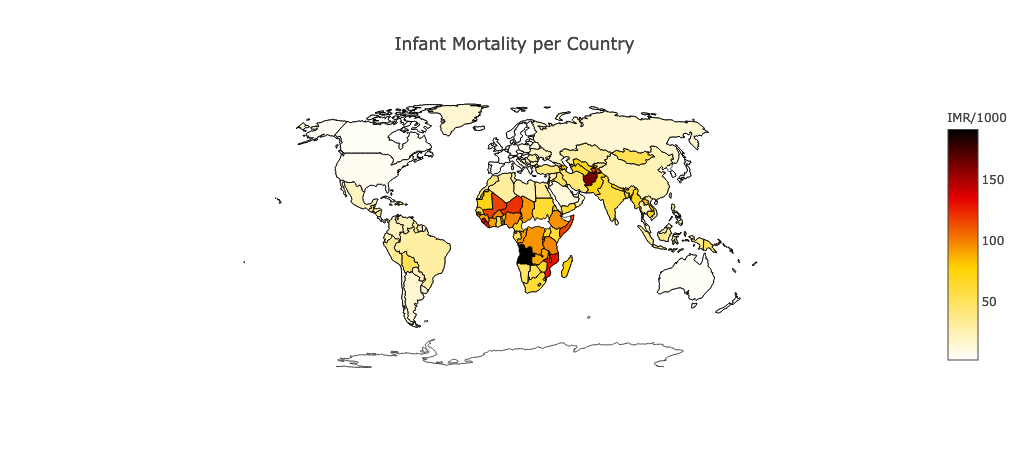

In [419]:
# Infant mortality per country per 1000 live births
data = dict(type='choropleth', 
            locations = df.country,
            locationmode = 'country names', 
            z = df.infmortality,
            text = df.country, 
            colorbar = {'title':'IMR/1000'},
            colorscale = 'Hot', 
            reversescale = True)

layout = dict(title='Infant Mortality per Country', geo=dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap, validate=False)

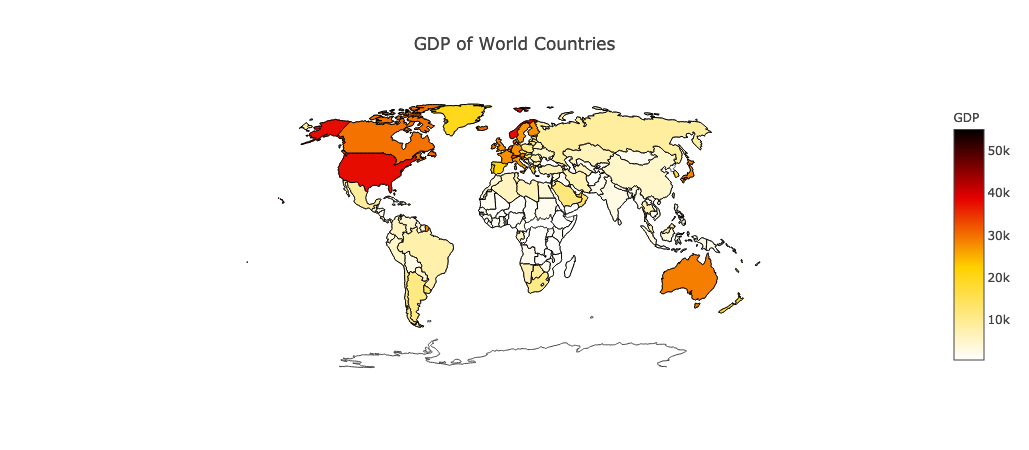

In [420]:
# GDP per country
data = dict(type='choropleth',
            locations = df.country,
            locationmode = 'country names', 
            z = df.gdp,
            text = df.country, 
            colorbar = {'title':'GDP'},
            colorscale = 'Hot', 
            reversescale = True)

layout = dict(title='GDP of World Countries', geo = dict(showframe=False, projection={'type':'natural earth'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap, validate=False)

In [421]:
# How infant mortality is corelated to other features?
#df[df.columns[:]].corr()['infmortality'][:]
pd.DataFrame(df.corr()['infmortality'].sort_values(ascending=False))

,infmortality
infmortality,1.00
birthrate,0.84
agriculture,0.69
deathrate,0.65
population,0.02
industry,0.01
area,-0.01
netmigr,-0.02
crops,-0.07
arable,-0.11


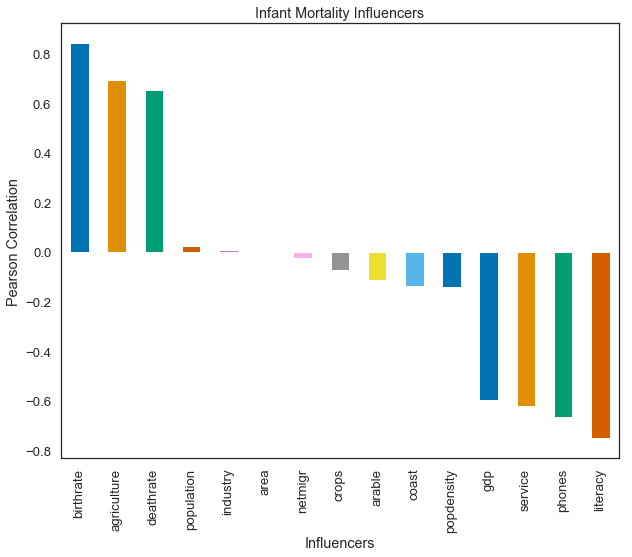

In [422]:
# What influences infant mortality most?
df.corr()['infmortality'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(10,8));
plt.title('Infant Mortality Influencers')
plt.xlabel('Influencers')
plt.ylabel('Pearson Correlation')
plt.savefig("./pics/infant_mortality_influencers.png", dpi=600);
plt.show();

Infant mortality is defined as the death of young children under the age of 1. This death toll is measured by the Infant Mortality Rate (IMR), which is the number of deaths of children under one year of age per 1000 live births. In the 21st century, in the age of robotics, genetics and sophisticated healthcare the infant mortality rate should be really low. But there are still countries in the world where on average 160 or more per 1000 infants die during the first year after birth (i.e. Angola - 191, Afganistan - 163 on average). This is especially true for regions like Asia and Africa.

Based on the world dataset, infant mortality is strictly related to the GDP and rates of different economical models representing a give nation. In general, nations with lower GDP, greater ratios of agriculture sector, lower ratios of service sector and lower literacy level have greater infant mortality. 

The more poor the nation is, the greater chance of premature mortality exists. The more educated and wealthy the nation is, the more chance infants have to survive. It may sound obvious, but poorer nations have greater birth rate in general which also results in greater ratio of infant mortality. 

Looking at the world maps of mortality and gdp we see they are like inverse of each other. Countries with greater GDP have lower infant mortality and vice versa.

In this context, it is important to that richer and more developed countries help the poorer ones both economically and especially in terms of education. The more aware and enlightened people become, the bigger care they will put into proper health-care infrastructure and treatment (vaccination, healthy life style and medical examinations during pregnancy, breastfeeding, etc.), and as a result the more chance to survive infants will be given.

### 3. What are the most significant predictors determining country's GDP per capita, the key indicator of economic development of any country?

In [423]:
# Randomize the dataset
np.random.seed(rstate)
index_list = list(X.index)
np.random.shuffle(index_list)
X = X.iloc[index_list]

In [424]:
# Take the target variable out from the dataset
y = X.pop('gdp')

In [425]:
# 80/20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rstate)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(181, 26) (181,)
(46, 26) (46,)


In [426]:
# Train a simple linear regression model (baseline)
model = LinearRegression()

In [427]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [428]:
predictions = model.predict(X_test)

# Best is 1.0
print(explained_variance_score(predictions, y_test))

0.7657274120806381


In [429]:
# R2 score
model.score(X_test,y_test)

0.7954022914591431

In [430]:
# Calculate the Root Mean Squared Error
print("RMSE: {:10,.6f}".format(math.sqrt(np.mean((model.predict(X_test) - y_test) ** 2))))

RMSE:   0.085409


In [431]:
# Does XGboost algorithm get better results?

#data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

model2 = xgb.XGBRegressor(n_estimators=100, 
                           learning_rate=0.08, 
                           gamma=0, 
                           subsample=0.75,
                           colsample_bytree=1, 
                           max_depth=7)

In [432]:
model2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [433]:
predictions = model2.predict(X_test)

# Best is 1.0
print(explained_variance_score(predictions, y_test))

0.8719671919077665


In [434]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.061178


<Figure size 3600x3600 with 0 Axes>

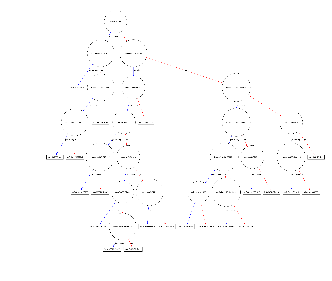

In [439]:
#plt.rcParams['figure.figsize'] = [30, 30]
plt.figure(figsize=(50, 50))
xgb.plot_tree(model2, num_trees=0)
plt.savefig("./pics/xgbtree.png", dpi=600);
plt.show();

<Figure size 720x720 with 0 Axes>

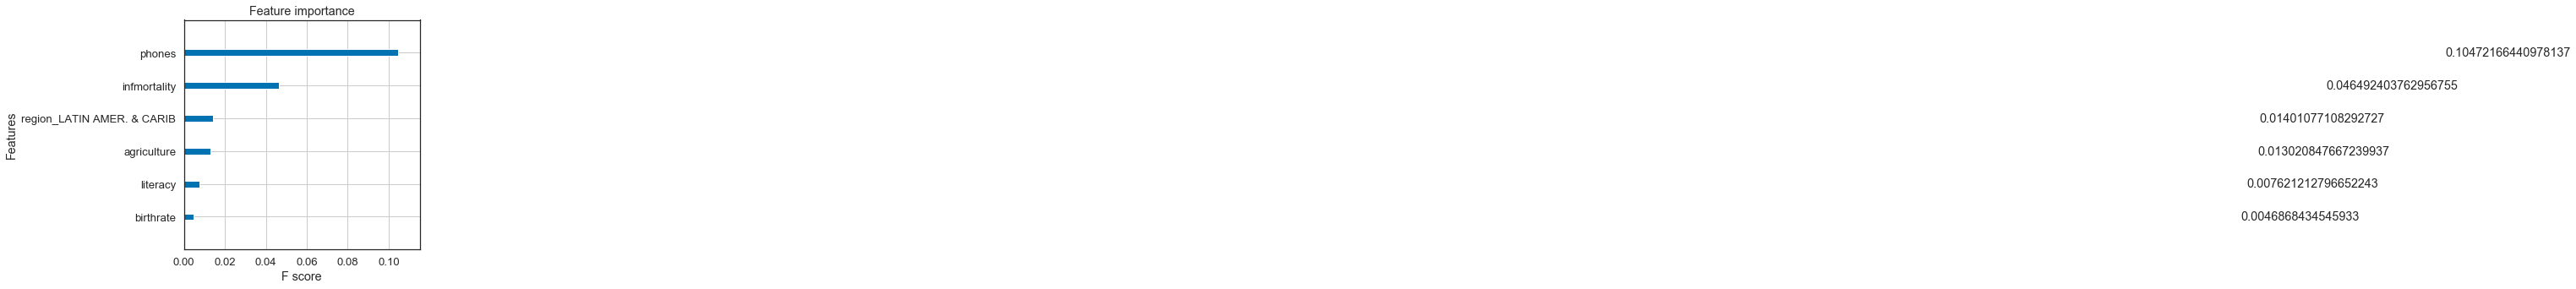

In [440]:
'''
How the importance is calculated: either "weight", "gain", or "cover" 
- "weight" is the number of times a feature appears in a tree 
- "gain" is the average "gain" of splits which use the feature 
- "cover" is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
'''
#plt.rcParams['figure.figsize'] = [5, 5]
plt.figure(figsize=(10, 10))
xgb.plot_importance(model2, importance_type='gain', max_num_features=6)
plt.savefig("./pics/xgbfimportance.png", dpi=600);
plt.show();

In [290]:
# Save the model to disk
filename = 'gdp_model.sav'
dump(model, open(filename, 'wb'))

The most important features used by a XGBoost model used to predict GDP are: phones (the wealthest nation is the more phones it has), infant mortality (poorer countries have greater IMR than wealthier countries), the fact that a country is in Latin America region (I do not know why this one is so important), the agriculture score, the level of literacy and birthrate. Using these features, the XGBoost model was able to get R squared score of 0.79 on test data.

## Deploy

In [291]:
# Test
# Load the model from disk
loaded_model = load(open(filename, 'rb'))
# R2 score
result = loaded_model.score(X_test, y_test)
print(result)

0.7954022914591431


A [blog post](https://github.com/ksatola/Countries-of-the-World/blob/master/BlogPost.md) answering the 3 questions.